In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import fkplotlib
import forestplot
from copy import copy
#%matplotlib notebook
#fkplotlib.use_txfonts()

" ()":{
        "Omega_m": (), "sigma_8": (), "S_8": ()
    },

In [14]:
def actual_S8(s8, es8, Omega_m, a, b):
    """
    From
        s8 = sigma_8 (Omega_m / a)^b
    to
        S8 = sigma_8 (Omega_m / 0.3)^0.5
    """
    S8 = (s8 * a ** b) / (np.sqrt(0.3) * Omega_m ** (b - 1/2))
    eS8 = (es8 * a ** b) / (np.sqrt(0.3) * Omega_m ** (b - 1/2))
    return S8, eS8

results = {
    r"\textit{Planck} (Planck18)":{
        "Omega_m": (0.3111, 0.0056), "sigma_8": (0.8102, 0.0060), "S_8": (0.825, 0.011)
    },
    "SPT (Balkenhol+21)":{
        "Omega_m": (), "sigma_8": (), "S_8": (0.78, 0.041)#(0.756, 0.042)
    },
    "ACT (Aiola+20)":{
        "Omega_m": (), "sigma_8": (), "S_8": (0.83, 0.043)
    },
    # ---------------------------------------------------------------------------------------- #
    r"\textit{Planck} (Planck16)":{
        "Omega_m": (0.32, 0.03), "sigma_8": (0.76, 0.003), "S_8": actual_S8(0.774, 0.034, 0.32, 0.31, 0.3)
    },
    "SPT (Bocquet+19)":{
        "Omega_m": (0.276, 0.047), "sigma_8": (0.781, 0.037), "S_8": (0.766, 0.025)
    },
    #"ACT (Hasselfield+13)":{
    #    "Omega_m": (0.284, 0.025), "sigma_8": (0.82, 0.025), "S_8": actual_S8(0.832, 0.042, 0.284, 0.3, 0.27)
    #},
    "DES (DES20)":{
        "Omega_m": (0.179, 0.035), "sigma_8": (0.85, 0.05), "S_8": (0.65, 0.037)
    },
    "KiDS (Lesci+20)":{
        "Omega_m": (0.24, 0.03), "sigma_8": (0.89, 0.05), "S_8": (0.8, 0.04)
    },
    "XXL$^*$ (Pacaud+18)":{
        "Omega_m": (0.399, 0.094), "sigma_8": (0.721, 0.071), "S_8": (0.831, 0.139, 0.141)
    },
    # ---------------------------------------------------------------------------------------- #
    "DES (Abbott+18)":{
        "Omega_m": (), "sigma_8": (), "S_8": (0.782, 0.024, 0.036)
    },
    "KiDS (Heymans+21)":{
        "Omega_m": (), "sigma_8": (), "S_8": (0.766, 0.014, 0.020)
    },
}

<IPython.core.display.Javascript object>


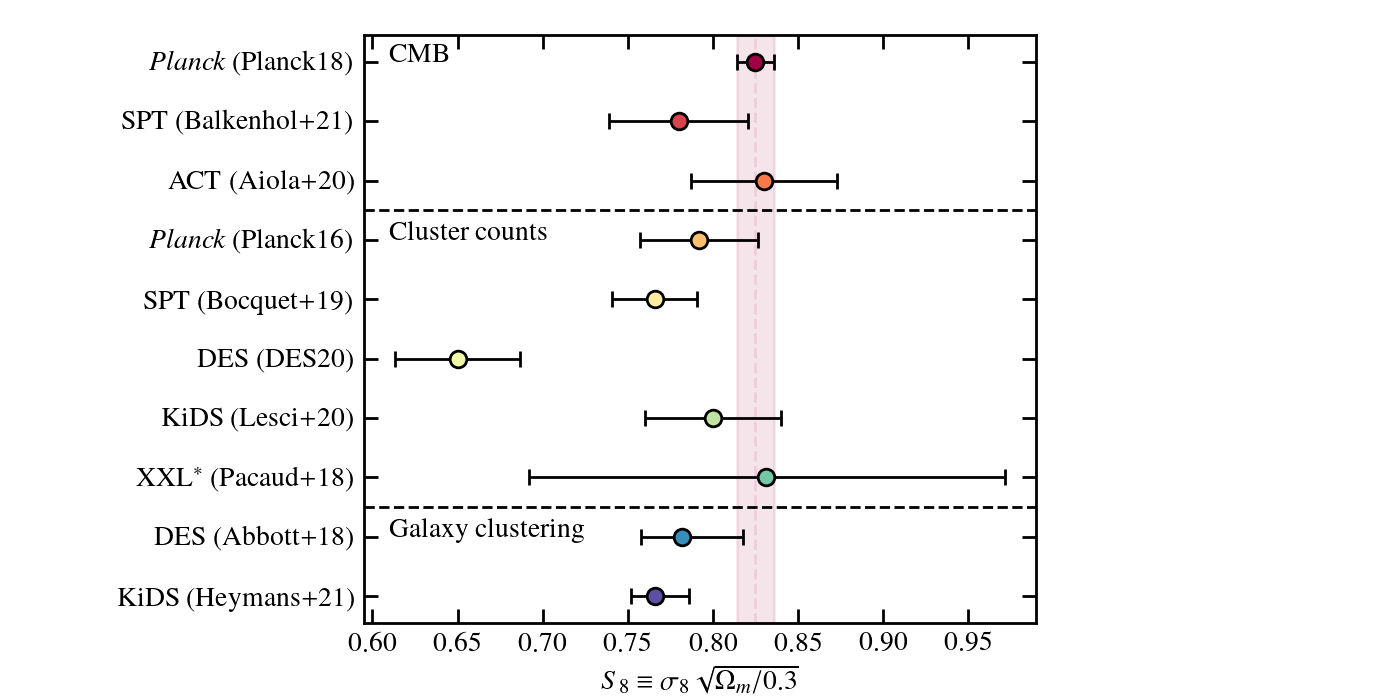

Text(0.61, 1.9000000000000004, 'Galaxy clustering')

In [15]:
def compute_S8(params):
    S8 = params["sigma_8"][0] * np.sqrt(params["Omega_m"][0] / 0.3)
    #err_S8 = np.sqrt(params["Omega_m"][0] / 0.3) * params["sigma_8"][1] + 0.5 * params["sigma_8"][0] * params["Omega_m"][1] / np.sqrt(params["Omega_m"][0] * 0.3)
    return S8

plt.close('all')
fp = forestplot.ForestPlot()
for ref, params in results.items():
    if params["S_8"] is None:
        params = copy(params)
        params["S_8"] = compute_S8(params)
    fp.add_measurement(params["S_8"], ref)
fig, ax = fp.do_plot(
    xlabel="$S_8 \equiv \sigma_8 \sqrt{\Omega_m/0.3}$", cmap="Spectral", first_ref=True, 
    capsize=3, mec="k", mew=1, ecolor="k", 
)
#fig.set_size_inches(4, 4)
fig.set_size_inches(7, 3.5)
fig.subplots_adjust(left=0.26, right=0.74, top=0.95)
ax.axhline(len(results) - 2.5, 0, 1, color="k", ls="--")
ax.axhline(len(results) - 7.5, 0, 1, color="k", ls="--")
ax.text(0.61, len(results) - 0.1, "CMB", horizontalalignment='left', verticalalignment='bottom')
ax.text(0.61, len(results) - 3.1, "Cluster counts", horizontalalignment='left', verticalalignment='bottom')
ax.text(0.61, len(results) - 8.1, "Galaxy clustering", horizontalalignment='left', verticalalignment='bottom')

In [16]:
fig.savefig("S8.pdf")